# Цифровая обработка сигналов - 7

| **Title**         | Digital signal processing |
| --- | --- |
| **Author**        | Alexander Kapitanov       |
| **Contact**       | sallador@bk.ru            |
| **Project lang**  | Python                    |
| **Packages**      | numpy, scipy, matplotlib  |
| **License**       | GNU GPL 3.0               |


## Введение

Перед вами обучающий материал по основам **цифровой обработки сигналов** с использованием средств языка программирования Python. Предполагается, что читатель имеет базовые знания из области высшей математики, а также владеет языком Python и хотя бы поверхностно знает различные python-библиотеки - numpy/scipy, matplotlib и другие. 

Для пользователей MATLAB / GNU Octave освоение материала с точки зрения программного кода не составит труда, поскольку основные функции и их атрибуты во многом идентичны и схожи с методами из python-библиотек.

## Оконные функции

Для аналоговых сигналов или для бесконечного по времени дискретного сигнала синусоидальной формы его спектр — это дельта-функция на частоте этого сигнала.  На практике спектр реального ограниченного по времени гармонического сигнала эквивалентен функции ~$\frac{sin(x)}{x} = sinc(x)$, а ширина главного лепестка зависит от длительности интервала анализа сигнала $Т$. Ограничение по времени есть ни что иное как умножение сигнала на прямоугольную огибающую.

Из предыдущих лекций мы узнали, что умножение сигналов во временной области есть свертка их спектров в частотной (и наоборот: свертка сигналов во временной области есть произведение их спектров). В связи с этим спектр ограниченного прямоугольной огибающей гармонического сигнала эквивалентен ~$sinc(x)$. Это также связано с тем, что мы не можем интегрировать сигнал на бесконечном интервале времени, а преобразование Фурье в дискретной форме, выраженное через конечную сумму — ограничено по числу отсчетов.

Как правило, длина БПФ в современных устройствах цифровой обработки принимает значения $N_{FFT}$ от 8 до нескольких миллионов точек. Ограничивая сигнал на интервале $N$, мы тем самым накладываем «окно» прямоугольной формы, длительностью $N$ отсчётов. Следовательно, результирующий спектр — есть спектр перемноженного гармонического сигнала и прямоугольной огибающей. 

Перейдем к примеру. Построим спектр короткого гармонического сигнала при следующих параметрах: длина сигнала $N=256$, длина БПФ - $N_{FFT}=2048$ . Для наглядности график спектра представим в логарифмическом масштабе.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
import scipy.signal as sig

%matplotlib inline

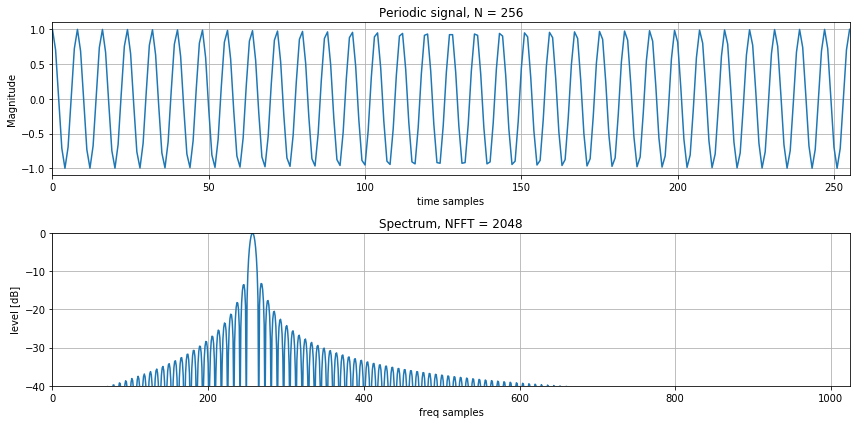

In [2]:
# Input parameters
N = 256
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(NFFT))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, NFFT//2])
plt.ylim([-40, 0])
plt.grid(True)
plt.tight_layout()

Как видно, спектр короткого гармонического сигнала в реальной жизни не эквивалентен дельта-функции, а похож на свертку спектров прямоугольного сигнала и гармонического сигнала. На графике показана первая половина частотной области. Итоговый сигнал - симметричен относительно половины частоты дискретизации или параметра $N_{FFT}/2$.

Напомним, что спектр прямоугольного сигнала эквивалентен выражению ~$\frac{sin(x)}{x} = sinc(x)$. То есть на частоте сигнала на дельта-функцию как бы "накладывается спектр прямоугольного окна. При увеличении длительности гармонического сигнала во временной области, его спектр стремится к дельта-функции на частоте этого сигнала, а влияние прямоугольного окна снижается.

То есть, огранение сигнала во времени приводит к наложению «окна» прямоугольной формы. На приведенном ниже примере длительность сигнала существенно увеличена ( $N = 65536$. Как видно, спектр такого сигнала стремится к дельта-функции.

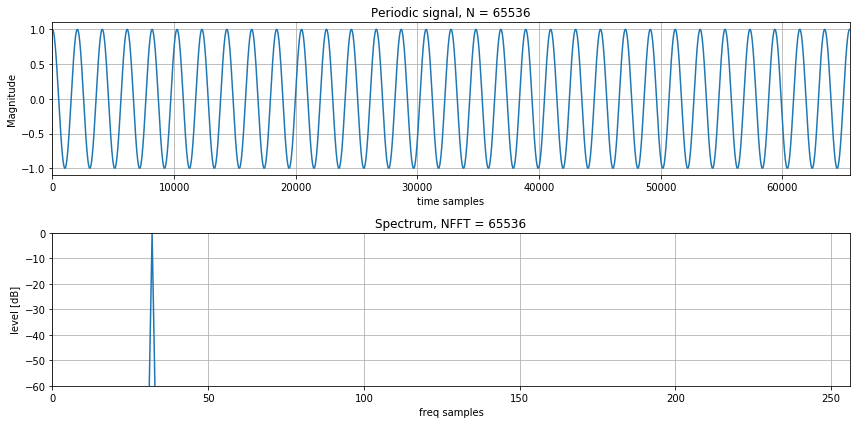

In [3]:
# Input parameters
N = 65536

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, N))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(N))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, N//256])
plt.ylim([-60, 0])
plt.grid(True)
plt.tight_layout()

К сожалению, в реальной жизни и на практике использование бесконечных сигналов - невозможно и трудозатратно:

- Очень длинные сигналы требуют больших объемов памяти для хранения значений.
- Длинные сигналы содержат больше энергии нежели короткие сигналы при прочих равных условиях, что в свою очередь затрудняет передачу и приём таких сигналов.
- Длинные сигналы требуют больше вычислительных ресурсов для их обработки (свёртка, фильтрация, преобразование Фурье).
- Длинные импульсы подвержены бОльшим искажениям, чем короткие в связи с повышенной длительностью распространения в физической среде.

При умножении сигнала на прямоугольное окно (усечение длинной последовательности до реального сигнала) происходит так называемый эффект "растекания спектра" или "размытия" спектра. Главная проблема размытия спектра связана с тем, что боковые лепестки более сильного сигнала могут скрыть в себе слабые сигналы. Ниже будет показано, как с помощью оконных функций снизить влияние растекания спектра.

### Оконные функции

В задачах цифровой обработки сигналов придуманы окна различной формы, которые при наложении на сигнал во временной области, позволяют качественно улучшить его спектральные характеристики. Большое количество всевозможных окон обусловлено в первую очередь одной из главных особенностей любого оконного наложения. Эта особенность выражается во взаимосвязи уровня боковых лепестков и ширины центрального лепестка. 

**Правило: чем сильнее подавление боковых лепестков спектра, тем шире главный лепесток спектра, и наоборот** 

Представим себе сигнал, который разбивается на несколько последовательностей, каждая из которых обрабатывается независимо, а затем сшивается в единый сигнал. При вычислении БПФ происходит наложение прямоугольного окна. Следовательно, последующее восстановление формы сигнала приведет к нежелательным эффектам, которые выражены в искажении формы сигнала на стыках (всплески сигнала). Для того, чтобы сгладить эти всплески можно применить оконную фильтрацию.

Одно из применений оконных функций: обнаружение слабых сигналов на фоне более сильных путём подавления уровня боковых лепестков. Основные оконные функции в задачах ЦОС — **треугольное, синусоидальное, окно Ланцоша, Ханна, Хэмминга, Блэкмана, Харриса, Блэкмана-Харриса, окно с плоской вершиной, окно Наталла, Гаусса, Кайзера** и множество других. Большая часть из них выражена через конечный ряд путём суммирования гармонических сигналов с определенными весовыми коэффициентами. Такие сигналы отлично реализуются на практике на любых аппаратных устройствах (программируемые логические схемы или сигнальные процессоры).

Окна сложной формы рассчитываются путём взятия экспоненты (окно Гаусса) или модифицированной функции Бесселя (окно Кайзера). Такие оконные функции сложнее реализуются в интегральных микросхемах (для вычисления функций экспоненты или функции Бесселя требуется таблица кодировки одного значения в другое). 

### Коэффициент подавления

Очевидно, что при умножении сигнала на оконную функцию происходит изменение амплитуды результирующего колебания. В задачах ЦОС вводится понятие коэффициента ослабления, который характеризует подавление сигнала в процессе оконной фильтрации в сравнении с прямоугольным окном. Формула для вычисления коэффициента ослабления:  

$ \beta = \frac{A_{w}}{A_{r}} \cdot \frac{1}{N} \sum_{n=0}^{N-1}w(n)$ , 

где: 
- $A_{w}$ - уровень постоянной составляющей оконной функции,
- $A_{r}$ - уровень постоянной составляющей прямоугольного окна,
- $w(n)$ - отсчеты оконной функции,
- $N$ - длина оконной функции.

С помощью python предварительно определим функцию, которая отображает оконные функции:

In [4]:
def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(12, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Window fucntion')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

### Основные оконные функции


Ниже приведены выражения для основных оконных функций. Длительность оконной функции - $N$ , $w(n)$ - отсчеты оконной функции. В Python библиотеке `scipy` в пакете `signal` доступны все широко известные окна. Их вызов достаточно прост. Далее в виде таблицы и графиков будет показана сравнительная эффективность различных окон.

**Правило: сумма модулей коэффициентов оконной функции равна единице!**


**Прямоугольное окно**

$w(n) = 1$

Самое простое окно, обладает наихудшими характеристиками и получается автоматически при усечении последовательности до $N$ отсчетов. Максимальный уровень боковых лепестков (УБЛ) частотной характеристики прямоугольного окна: **-13 дБ**.

Python: `signal.boxcar(M)`

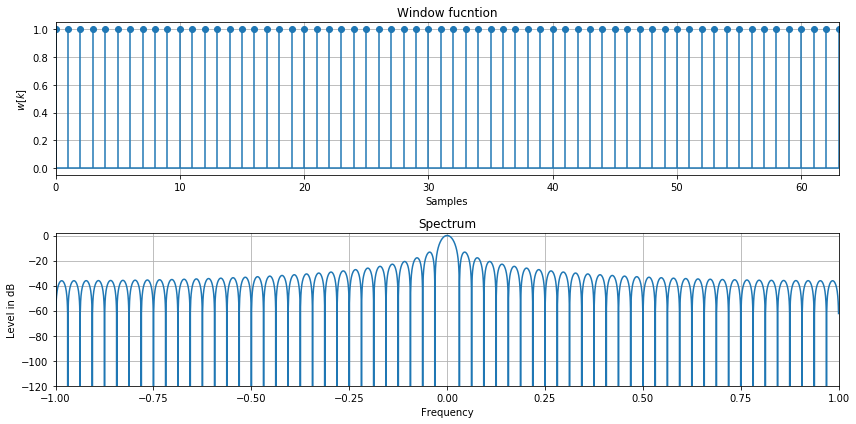

In [5]:
N = 64
dft_win(np.ones(N))

**Треугольное окно**

Также известно как окно Бартлета.

$w(n) = 1 - \frac{n - N / 2}{L / 2}$

где 

$L = N, N+1, N+2 $

Максимальный уровень боковых лепестков: **-26 дБ**.

Python: `signal.triang(M)` или `bartlett(M)`

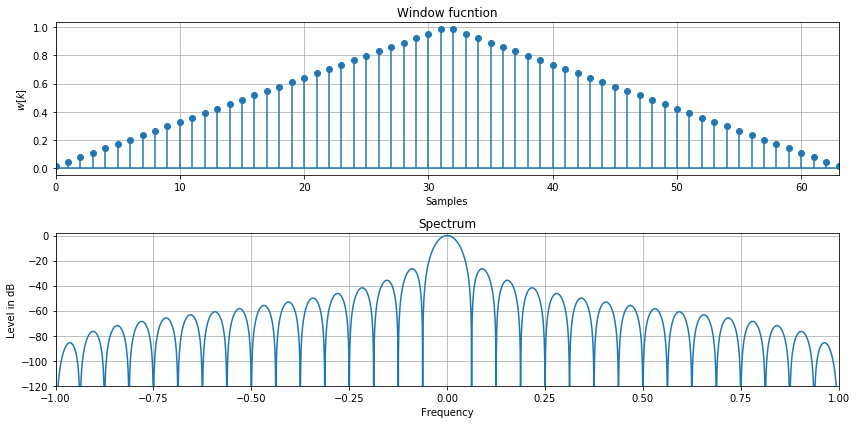

In [6]:
N = 64
dft_win(sig.triang(N))

**Синус**

$w(n) = sin(\frac{\pi\cdot n}{N-1})$

Простое с точки зрения программной и аппаратной реализации окно. Максимальный уровень боковых лепестков синусоидального окна: **-23 дБ**.

Python: `signal.cosine(M)`

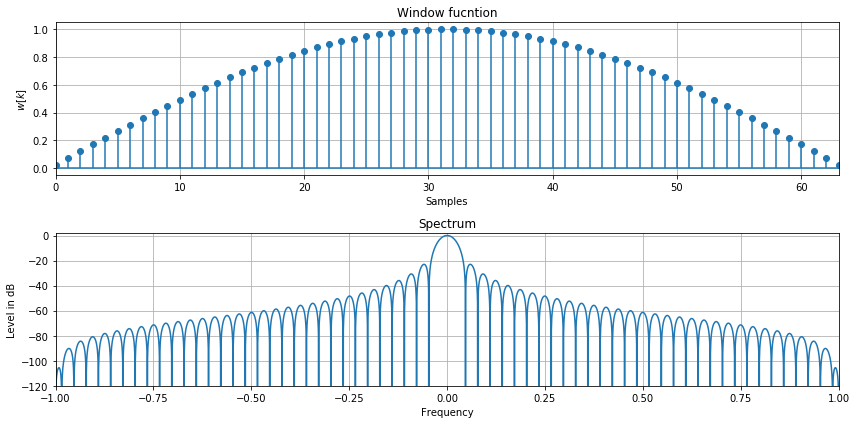

In [7]:
N = 64
dft_win(sig.cosine(N))

**Окно Ханна (Хеннинга)**

$w(n) = 0.5 \cdot [1 - cos(\frac{2\pi n}{N-1})]$

Также это окно называют окном Блэкмана-Харриса второго порядка. Максимальный уровень боковых лепестков синусоидального окна: **-31.5 дБ**.

Python: `signal.hann(M)` и `signal.hanning(M)`

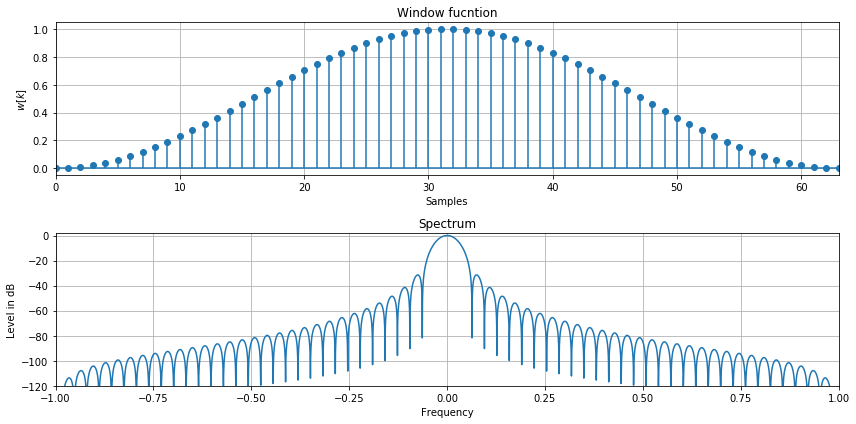

In [8]:
N = 64
dft_win(sig.hann(N))

**Окно Хемминга**

$w(n) = 0.53836 - 0.46164 \cdot cos(\frac{2\pi n}{N-1})$

Максимальный уровень боковых лепестков: **-42 дБ**.

Python: `signal.hamming(M)`


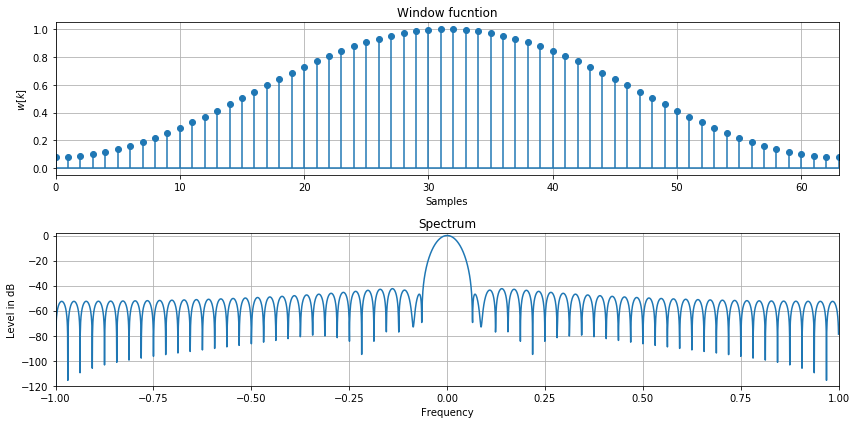

In [9]:
N = 64
dft_win(sig.hamming(N))

**Окно Блэкмана**

$w(n) = a_0 - a_1 \cdot cos(\frac{2\pi n}{N-1}) +  a_2 \cdot cos(\frac{4\pi n}{N-1}) $

где 

$a_0 = \frac{1-\alpha}{2}; a_1 = 0.5 ; a_2 = 0.5\cdot\alpha $

При $\alpha = 0.16$ максимальный уровень боковых лепестков: **-58 дБ**.

Python: `signal.blackman(M)`

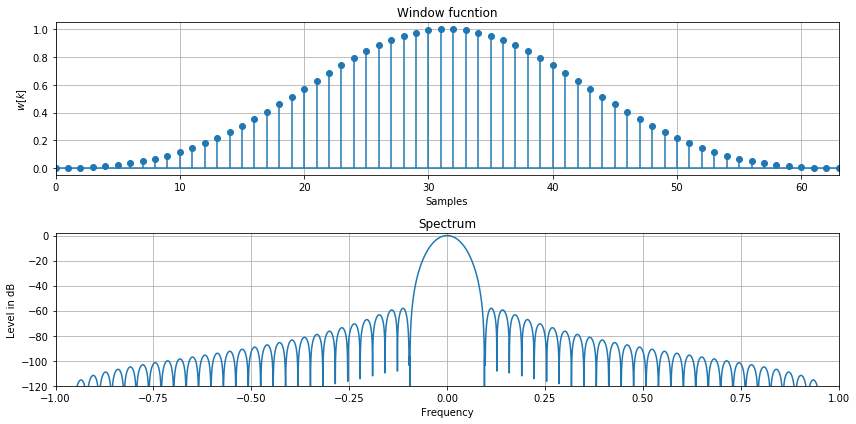

In [10]:
N = 64
dft_win(sig.blackman(N))

**Окно Блэкмана-Харриса**

Задается суммой четырех слагаемых (то есть окно четвертого порядка).

$w(n) = a_0 - a_1 \cdot cos(\frac{2\pi n}{N-1}) +  a_2 \cdot cos(\frac{4\pi n}{N-1}) - a_3 \cdot cos(\frac{6\pi n}{N-1}) $

где 

$a_0 = 0.35875, a_1 = 0.48829, a_2 = 0.14128, a_3 = 0.01168 $

Максимальный уровень боковых лепестков: **-92 дБ**.

Python: `signal.blackmanharris(M)`

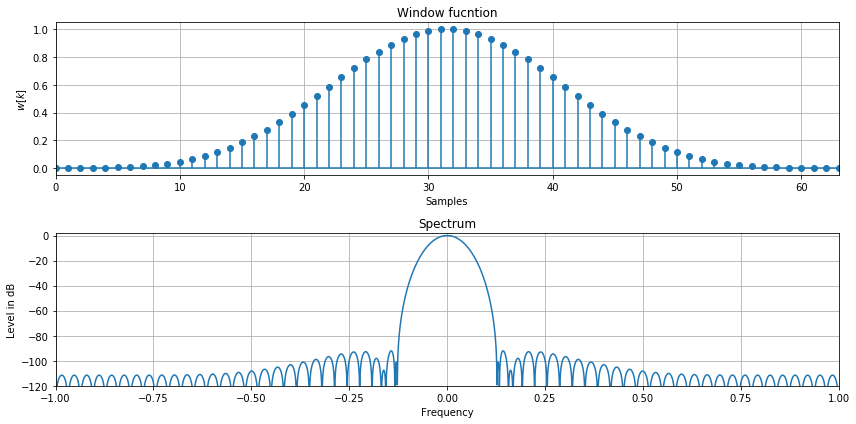

In [11]:
N = 64
dft_win(sig.blackmanharris(N))

**Окно Блэкмана-Наталла**

Формула аналогична окну Блэкмана-Харриса. Различие лишь в коэффициентах. Задается суммой четырех слагаемых.

$w(n) = a_0 - a_1 \cdot cos(\frac{2\pi n}{N-1}) +  a_2 \cdot cos(\frac{4\pi n}{N-1}) - a_3 \cdot cos(\frac{6\pi n}{N-1}) $

где 

$a_0 = 0.3635819, a_1 = 0.4891775, a_2 = 0.1365995, a_3 = 0.0106411 $

Максимальный уровень боковых лепестков: **-93 дБ**.

Python: `signal.nuttall(M)`

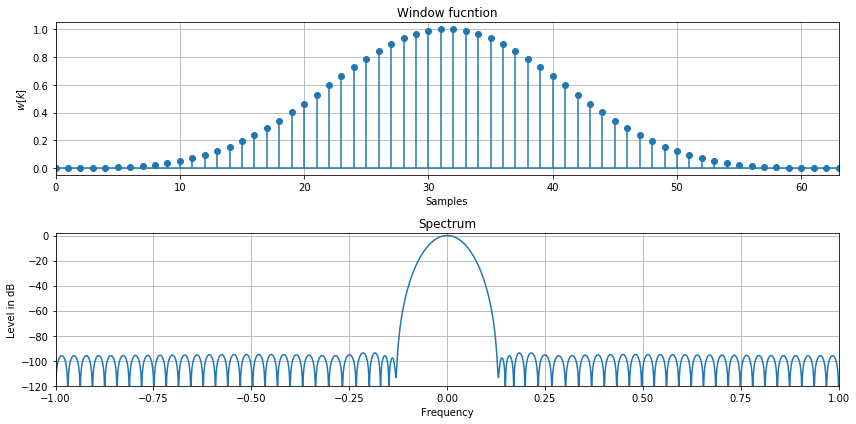

In [12]:
N = 64
dft_win(sig.nuttall(N))

**Окно с плоской вершиной**

Окно с плоской вершиной (Flat-top window).

$w(n) = a_0 - a_1 \cdot cos(\frac{2\pi n}{N-1}) +  a_2 \cdot cos(\frac{4\pi n}{N-1}) - a_3 \cdot cos(\frac{6\pi n}{N-1}) + a_4 \cdot cos(\frac{8\pi n}{N-1}) $

где 

$a_0 = 0.21556895, $

$a_1 = 0.41663158, $

$a_2 = 0.277263158, $

$a_3 = 0.083578947, $

$a_4 = 0.0069474 $

Максимальный уровень боковых лепестков: **-70 дБ**.

Python: `signal.flattop(M)`

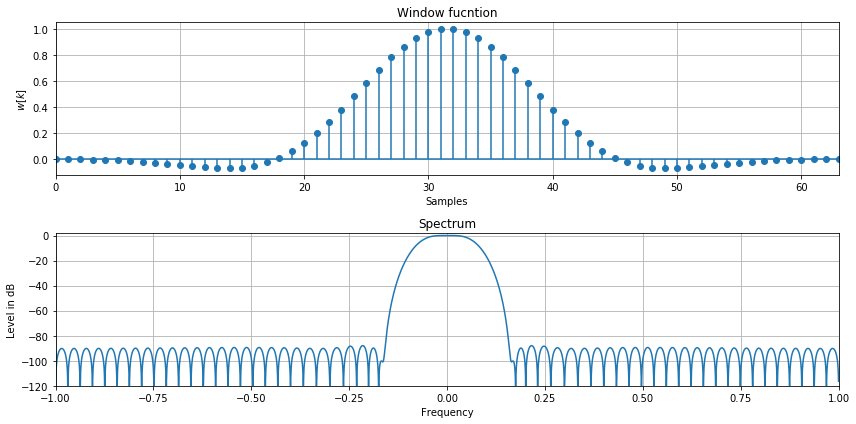

In [13]:
N = 64
dft_win(sig.flattop(N))

**Окно Кайзера**

Окно Кайзера. Варьируется с помощью параметра $\beta$, который определяет уровень затухания и крутизну спада частотной характеристики. Окно Кайзера - своего рода универсальное окно, с помощью которого можно выбирать те или иные параметры фильтрации для широкого класса задач.

$w(n) = \frac{|I_{0} \sqrt{1 - (\frac{2n-N+1}{N-1})^2} |}{|I_{0}(\beta)|}$

где 

- $I_{0}$ - модифицированная функция Бесселя первого рода нулевого порядка.
- $\beta $ - коэффициент, который определяет долю энергии, сосредоточенной в главном лепестке спектра оконной функции. 

Чем больше $\beta$, тем больше доля энергии внутри главного лепестка, и тем шире главный лепесток. Следовательно, тем меньше уровень боковых лепестков (лучше подавление в задачах фильтрации). На практике функция Кайзера в аппаратной части практически не реализуется, но применяется программно (расчет коэффициентов КИХ-фильтра). В реальных задачах используются значения $\beta$ от 5 до 11.

Python: `signal.kaiser(M, beta)`

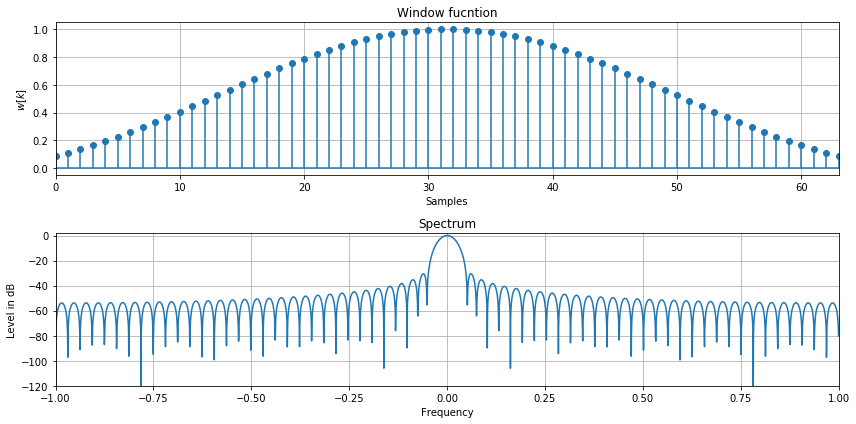

In [14]:
N = 64
dft_win(sig.kaiser(N, beta=4))

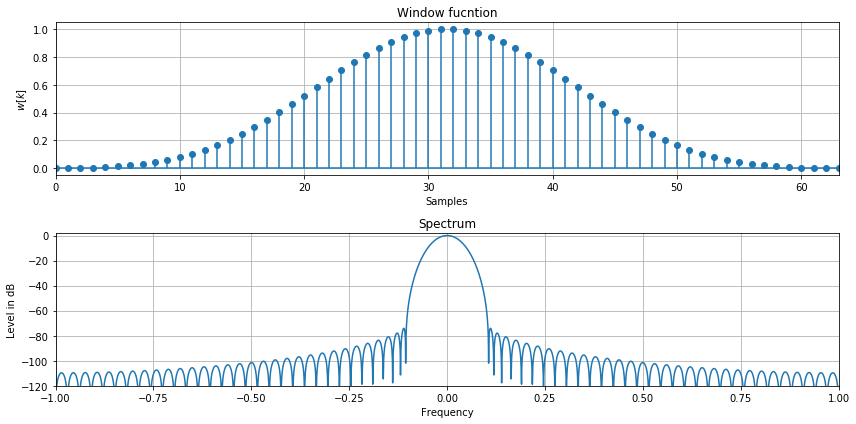

In [15]:
N = 64
dft_win(sig.kaiser(N, beta=10))

**Окно Гаусса**

Окно Гаусса задается экспоненциальной функцией и варьируется параметром дисперсии (среднеквадратического отклонения).

$w(n) = e^{-\frac{1}{2}(\frac{n}{\sigma})^{2}}$


Частотные свойства окна зависят от параметра $\sigma$. 

Чем больше $\sigma$, тем уже главный лепесток, но выше уровень боковых лепестков (хуже подавление). 

На практике окно Гаусса в аппаратной части практически не реализуется, но применяется программно, например в задачах расчета коэффициентов КИХ-фильтра.

Python: `signal.gaussian(M, std)`

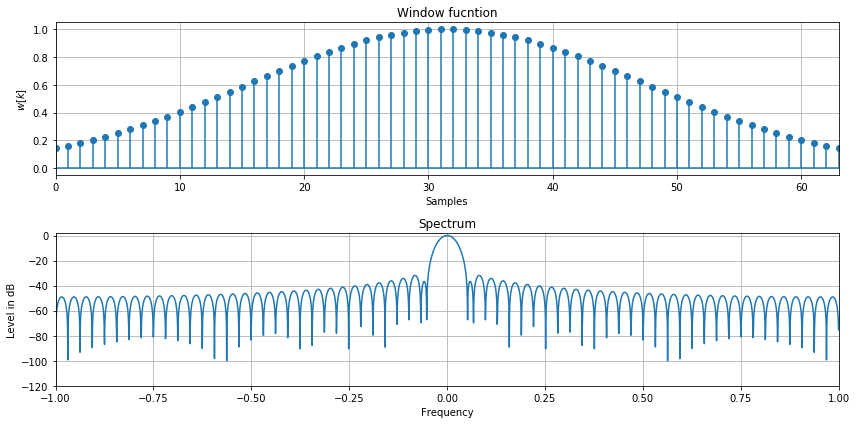

In [16]:
N = 64
dft_win(sig.gaussian(N, std=16))

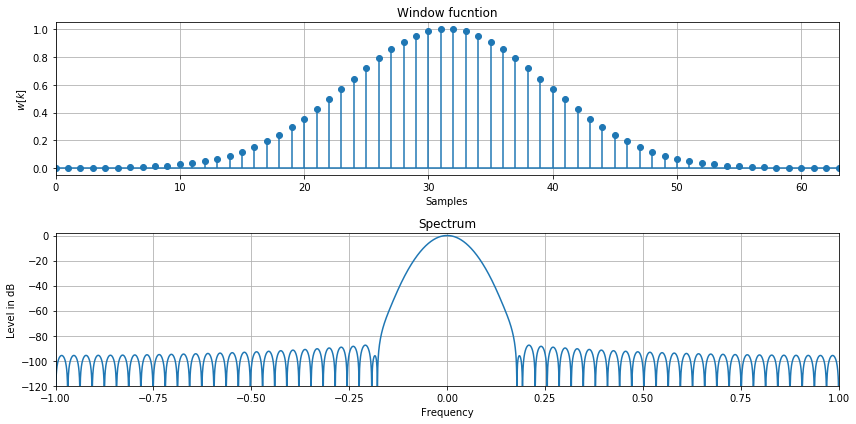

In [17]:
N = 64
dft_win(sig.gaussian(N, std=8))

Мы рассмотрели основные оконные функции. 

### Оконные функции numpy

В python пакете numpy набор оконных функций ограничен.

- bartlett(M) - треугольная функция,
- blackman(M) - функция Блэкмана,
- hamming(M)  - окно Хэмминга,
- hanning(M)  - окно Хэннинга или Ханна,
- kaiser(M, beta) - окно Кайзера.
____

В отличие от numpy пакет scipy расширяет возможности оконной фильтрации, и как было видно в примерах выше - дополняет функционал. Приведем список основных функций из пакета `scipy.signal`

### Оконные функции scipy

| **Function**      | **Description** | **Side-Lobe Level** |
| --- | --- | --- | 
| `boxcar(M[, sym])`         | Прямоугольное окно                   | 13   | 
| `triang(M[, sym])`         | Треугольное окно                     | 26   | 
| `bartlett(M[, sym])`       | Треугольное окно (Бартлета)          | 26   | 
| `cosine(M[, sym])`         | Косинусное окно                      | 23   | 
| `hann(M[, sym])`           | Окно Ханна (Хеннинга)                | 31.5 | 
| `hanning(M[, sym])`        | Окно Хеннинга (Ханна)                | 31.5 | 
| `hamming(M[, sym])`        | Окно Хемминга                        | 42   | 
| `blackman(M[, sym])`       | Окно Блэкмана                        | 58   | 
| `blackmanharris(M[, sym])` | Функция Блэкмана-Харриса             | 92   | 
| `nuttall(M[, sym])`        | Окно Наттала                         | 93   | 
| `flattop(M[, sym])`        | Окно с плоской вершиной              | 70   | 
| `kaiser(M, beta[, sym])`   | Функция Кайзера (параметр - $\beta$) | $f(\beta)$ | 
| `gaussian(M, std[, sym])`  | Функция Гаусса (параметр - $\sigma$) | $f(\sigma)$  | 

### Поиск слабых сигналов

Ранее было сказано, что с помощью оконной фильтрации возможно выделение слабых сигналов на фоне более сильных. Докажем это, построив график суммы двух гармонических сигналов, расположенных близко друг к другу по частоте и существенно отличающихся по амплитуде. 

На следующем графике приведен спектр без оконной фильтрации (окно - прямоугольное) и с фильтрацией входного сигнала окном Кайзера с заданным параметром $beta = 7$

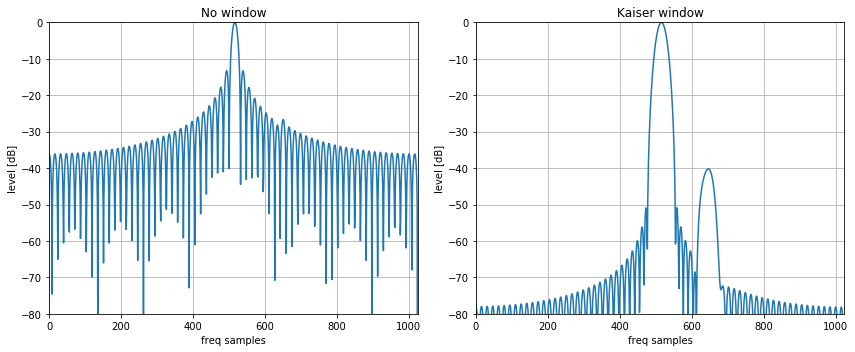

In [18]:
# Input parameters
N = 128
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = 100*np.cos(2*np.pi*32*tt)+np.cos(2*np.pi*40*tt)

# Window (Kaiser)
wn = sig.kaiser(N, beta=7)
yy = xx*wn

# Calculate FFT 1
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

# Calculate FFT 2
yft = np.abs(fft(yy, NFFT))
ylg = 20*np.log10(yft / np.max(yft))

lst_ffts = [slg, ylg]
lst_wins = ['No window', 'Kaiser window']
plt.figure(figsize=(12, 5))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(lst_wins[i])
    plt.xlabel('freq samples')
    plt.ylabel('level [dB]')
    plt.plot(lst_ffts[i])
    plt.xlim([0, NFFT//2])
    plt.ylim([-80, 0])
    plt.grid(True)
plt.tight_layout()

Как видно на предыдущем рисунке, без оконной функции практически невозможно различить слабый сигнал на фоне сильного. Однако, применяя оконную функцию с хорошими свойствами подавления, удается детектировать слабый сигнал на фоне сильного!